In [1]:
import numpy as np

In [33]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.datasets import make_blobs

In [39]:
x, labeles = make_blobs(100, 2, 3)

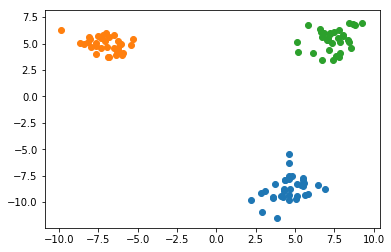

In [40]:
plt.scatter(x[labeles == 0, 0], x[labeles == 0, 1])
plt.scatter(x[labeles == 1, 0], x[labeles == 1, 1])
plt.scatter(x[labeles == 2, 0], x[labeles == 2, 1])

In [41]:
from sklearn.decomposition import DictionaryLearning, SparseCoder

In [44]:
labeles

array([2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0,
       2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 0])

In [45]:
dl = DictionaryLearning(3)
dl_pred = dl.fit_transform(x)

In [56]:
(np.where(dl_pred[:, np.array([0,2,1])] != 0)[1] == labeles).sum()

99

In [57]:
dl.components_

array([[-0.41218618,  0.91109964],
       [-0.80178648, -0.59761061],
       [ 0.83311475, -0.55310019]])

In [61]:
dl_pred[:3]

array([[ 0.        , -9.84189114,  0.        ],
       [ 0.        ,  0.        , -8.63971417],
       [ 0.        , -8.51447757,  0.        ]])

In [59]:
sc = SparseCoder(dl.components_, transform_algorithm='lasso_lars')

In [62]:
sc_pred = sc.fit_transform(x)

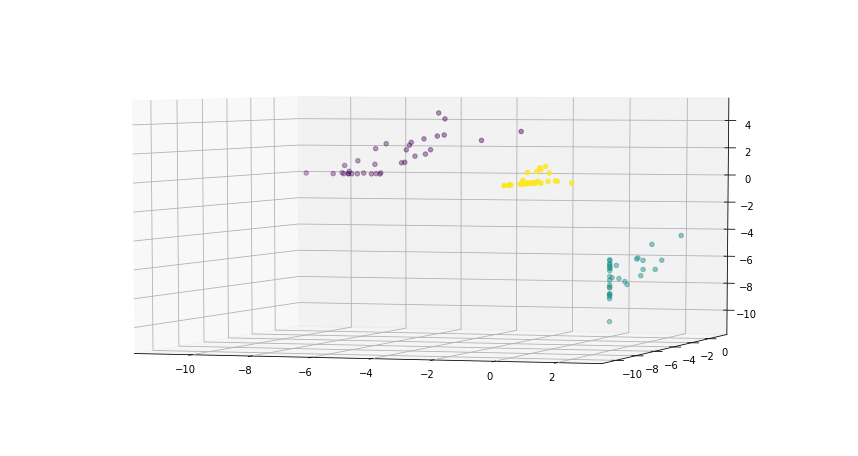

In [68]:
plot_ds = sc_pred
fig = plt.figure(figsize=(15, 8))
# plt.suptitle("Manifold Learning with %i points, %i neighbors"
#              % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(111, projection='3d')
ax.scatter(plot_ds[:, 0], plot_ds[:, 1], plot_ds[:, 2], c=labeles/3)#, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


In [5]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

%matplotlib inline

Automatically created module for IPython interactive environment


In [76]:
# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

In [77]:
newX = []
new_color = []

for x,c in zip(X, color):
    if x[2] > 1.7 or (x[2] < 0.2 and x[2] > -0.2) or x[2] < -1.7:
        newX.append(x)
        new_color.append(c)
    else:
        if np.random.rand() < 0.5:
            newX.append(x)
            new_color.append(c)
            
X = np.stack(newX)
color = np.array(new_color)

standard: 0.13 sec
ltsa: 0.22 sec
hessian: 0.32 sec
modified: 0.26 sec
Isomap: 0.26 sec
MDS: 1.4 sec
SpectralEmbedding: 0.08 sec


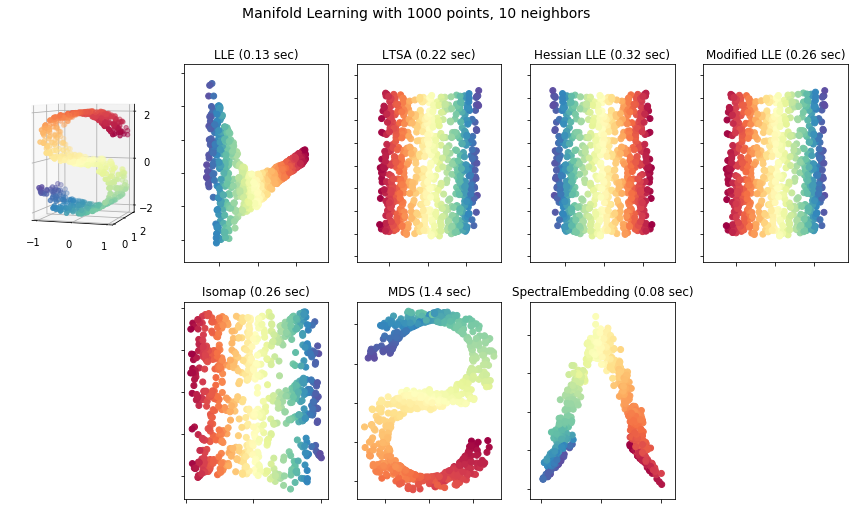

In [78]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# t0 = time()
# tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
# Y = tsne.fit_transform(X)
# t1 = time()
# print("t-SNE: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(2, 5, 10)
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# plt.title("t-SNE (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

plt.show()

In [75]:
plt.show()